In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Results for baseline and mamba models
- Need to add results for Mamba to compare with baseline model.
- Probably a good idea to add different Mamba models to show progress.

In [2]:
import os
import pandas as pd

basefolder = r'Results'
result_folders = [r'ipnet', r'rnn', r'transformer', r'MOE_attention_MAMBA', r'multi_head_attention', r'attention_classifier', r'MOE_v2', r'seft']
splits = [r'split_1', r'split_2', r'split_3', r'split_4', r'split_5']
files = [r'test_results.json', r'training_log.csv']

mamba_folder_split = r'Results/MOE_attention_MAMBA/split_1'
df = pd.read_csv(os.path.join(mamba_folder_split, files[1]), delimiter=',')

dfs = {}

for folder in result_folders:
    folder_path = os.path.join(basefolder, folder)
    splits_paths = [os.path.join(folder_path, split) for split in splits]

    df = pd.read_csv(os.path.join(splits_paths[0], files[1]), delimiter=',')
    for split in splits[1:]:
        test_results_split = os.path.join(folder_path, split, files[1])
        df2 = pd.read_csv(test_results_split)
        df = pd.concat([df, df2], axis=0)

    df = df.groupby('epoch').mean()
    dfs[folder] = df

df_ipnet = dfs['ipnet']
df_rnn = dfs['rnn']
df_transformer = dfs['transformer']
df_moe = dfs['MOE_attention_MAMBA']
df_moe_v2 = dfs['MOE_v2']
df_multi_head = dfs['multi_head_attention']
df_attention_classifier = dfs['attention_classifier']
df_seft = dfs['seft']

df_attention_classifier['train_loss'] = df_attention_classifier['train_loss'].apply(lambda x: x if x < 1 else np.mean(df_attention_classifier['train_loss']))
df_attention_classifier['val_loss'] = df_attention_classifier['val_loss'].apply(lambda x: x if x < 1 else np.mean(df_attention_classifier['train_loss']))

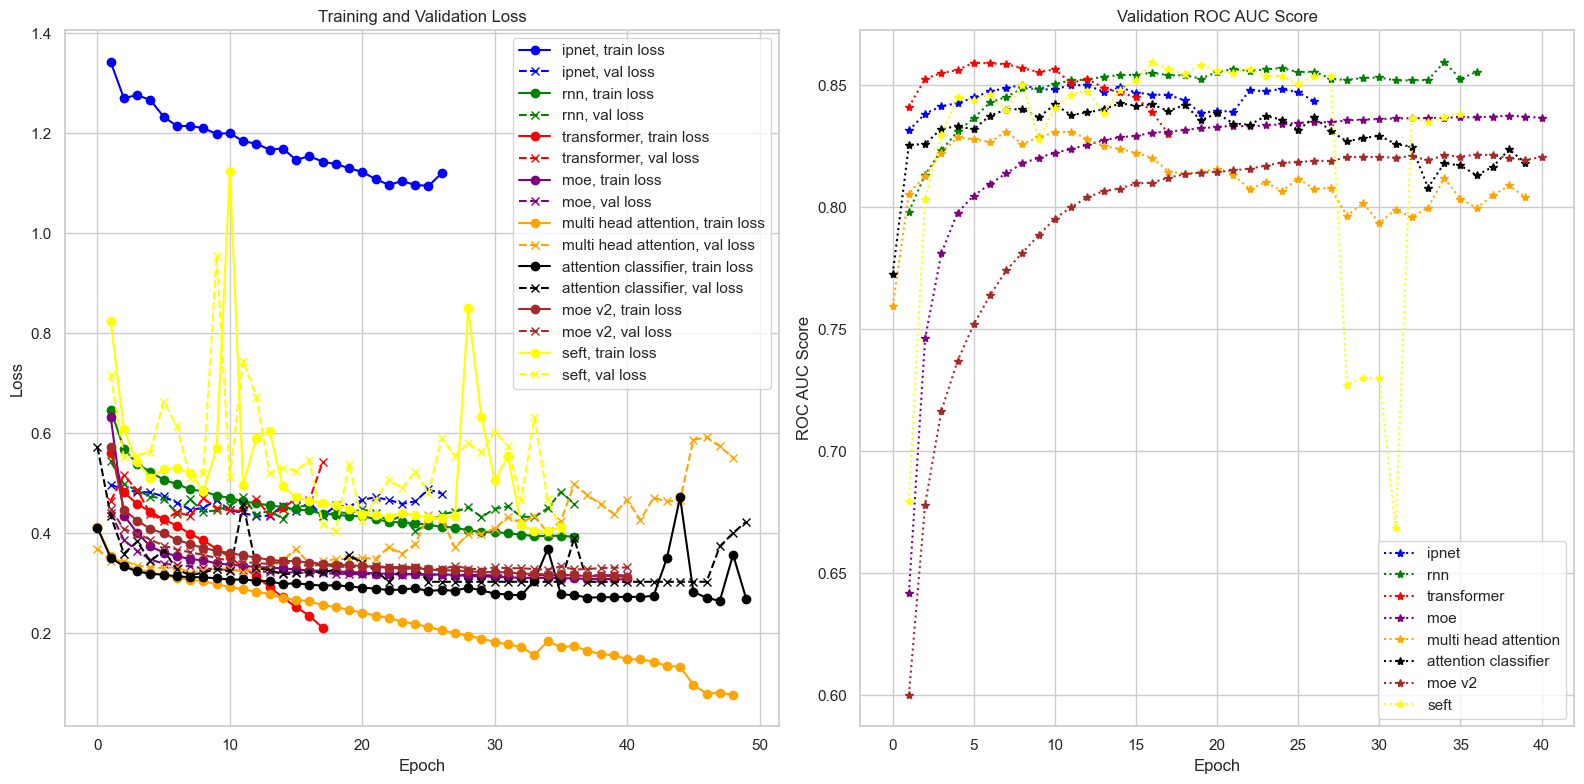

In [6]:

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

colors = {
    'ipnet': 'blue',
    'rnn': 'green',
    'transformer': 'red',
    'moe_attention': 'purple'
}

axs[0].plot(df_ipnet['train_loss'], label='ipnet, train loss', linestyle='-', marker='o', color=colors['ipnet'])
axs[0].plot(df_ipnet['val_loss'], label='ipnet, val loss', linestyle='--', marker='x', color=colors['ipnet'])
axs[0].plot(df_rnn['train_loss'], label='rnn, train loss', linestyle='-', marker='o', color=colors['rnn'])
axs[0].plot(df_rnn['val_loss'], label='rnn, val loss', linestyle='--', marker='x', color=colors['rnn'])
axs[0].plot(df_transformer['train_loss'], label='transformer, train loss', linestyle='-', marker='o', color=colors['transformer'])
axs[0].plot(df_transformer['val_loss'], label='transformer, val loss', linestyle='--', marker='x', color=colors['transformer'])
axs[0].plot(df_moe['train_loss'][:40], label='moe, train loss', linestyle='-', marker='o', color=colors['moe_attention']) # starts overfitting here
axs[0].plot(df_moe['val_loss'][:40], label='moe, val loss', linestyle='--', marker='x', color=colors['moe_attention']) # starts overfitting here
axs[0].plot(df_multi_head['train_loss'], label='multi head attention, train loss', linestyle='-', marker='o', color='orange')
axs[0].plot(df_multi_head['val_loss'], label='multi head attention, val loss', linestyle='--', marker='x', color='orange')
axs[0].plot(df_attention_classifier['train_loss'], label='attention classifier, train loss', linestyle='-', marker='o', color='black')
axs[0].plot(df_attention_classifier['val_loss'], label='attention classifier, val loss', linestyle='--', marker='x', color='black')
axs[0].plot(df_moe_v2['train_loss'][:40], label='moe v2, train loss', linestyle='-', marker='o', color='brown')
axs[0].plot(df_moe_v2['val_loss'][:40], label='moe v2, val loss', linestyle='--', marker='x', color='brown')
axs[0].plot(df_seft['train_loss'], label='seft, train loss', linestyle='-', marker='o', color='yellow')
axs[0].plot(df_seft['val_loss'], label='seft, val loss', linestyle='--', marker='x', color='yellow')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(df_ipnet['val_roc_auc_score'], label='ipnet', linestyle=':', marker='*', color=colors['ipnet'])
axs[1].plot(df_rnn['val_roc_auc_score'], label='rnn', linestyle=':', marker='*', color=colors['rnn'])
axs[1].plot(df_transformer['val_roc_auc_score'], label='transformer', linestyle=':', marker='*', color=colors['transformer'])
axs[1].plot(df_moe['auc_score'][:40], label='moe', linestyle=':', marker='*', color=colors['moe_attention']) # starts overfitting here
axs[1].plot(df_multi_head['roc_auc_score'][:40], label='multi head attention', linestyle=':', marker='*', color='orange')
axs[1].plot(df_attention_classifier['roc_auc_score'][:40], label='attention classifier', linestyle=':', marker='*', color='black')
axs[1].plot(df_moe_v2['auc_score'][:40], label='moe v2', linestyle=':', marker='*', color='brown')
axs[1].plot(df_seft['val_roc_auc_score'][:40], label='seft', linestyle=':', marker='*', color='yellow')
axs[1].set_title('Validation ROC AUC Score')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('ROC AUC Score')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

154 154 154


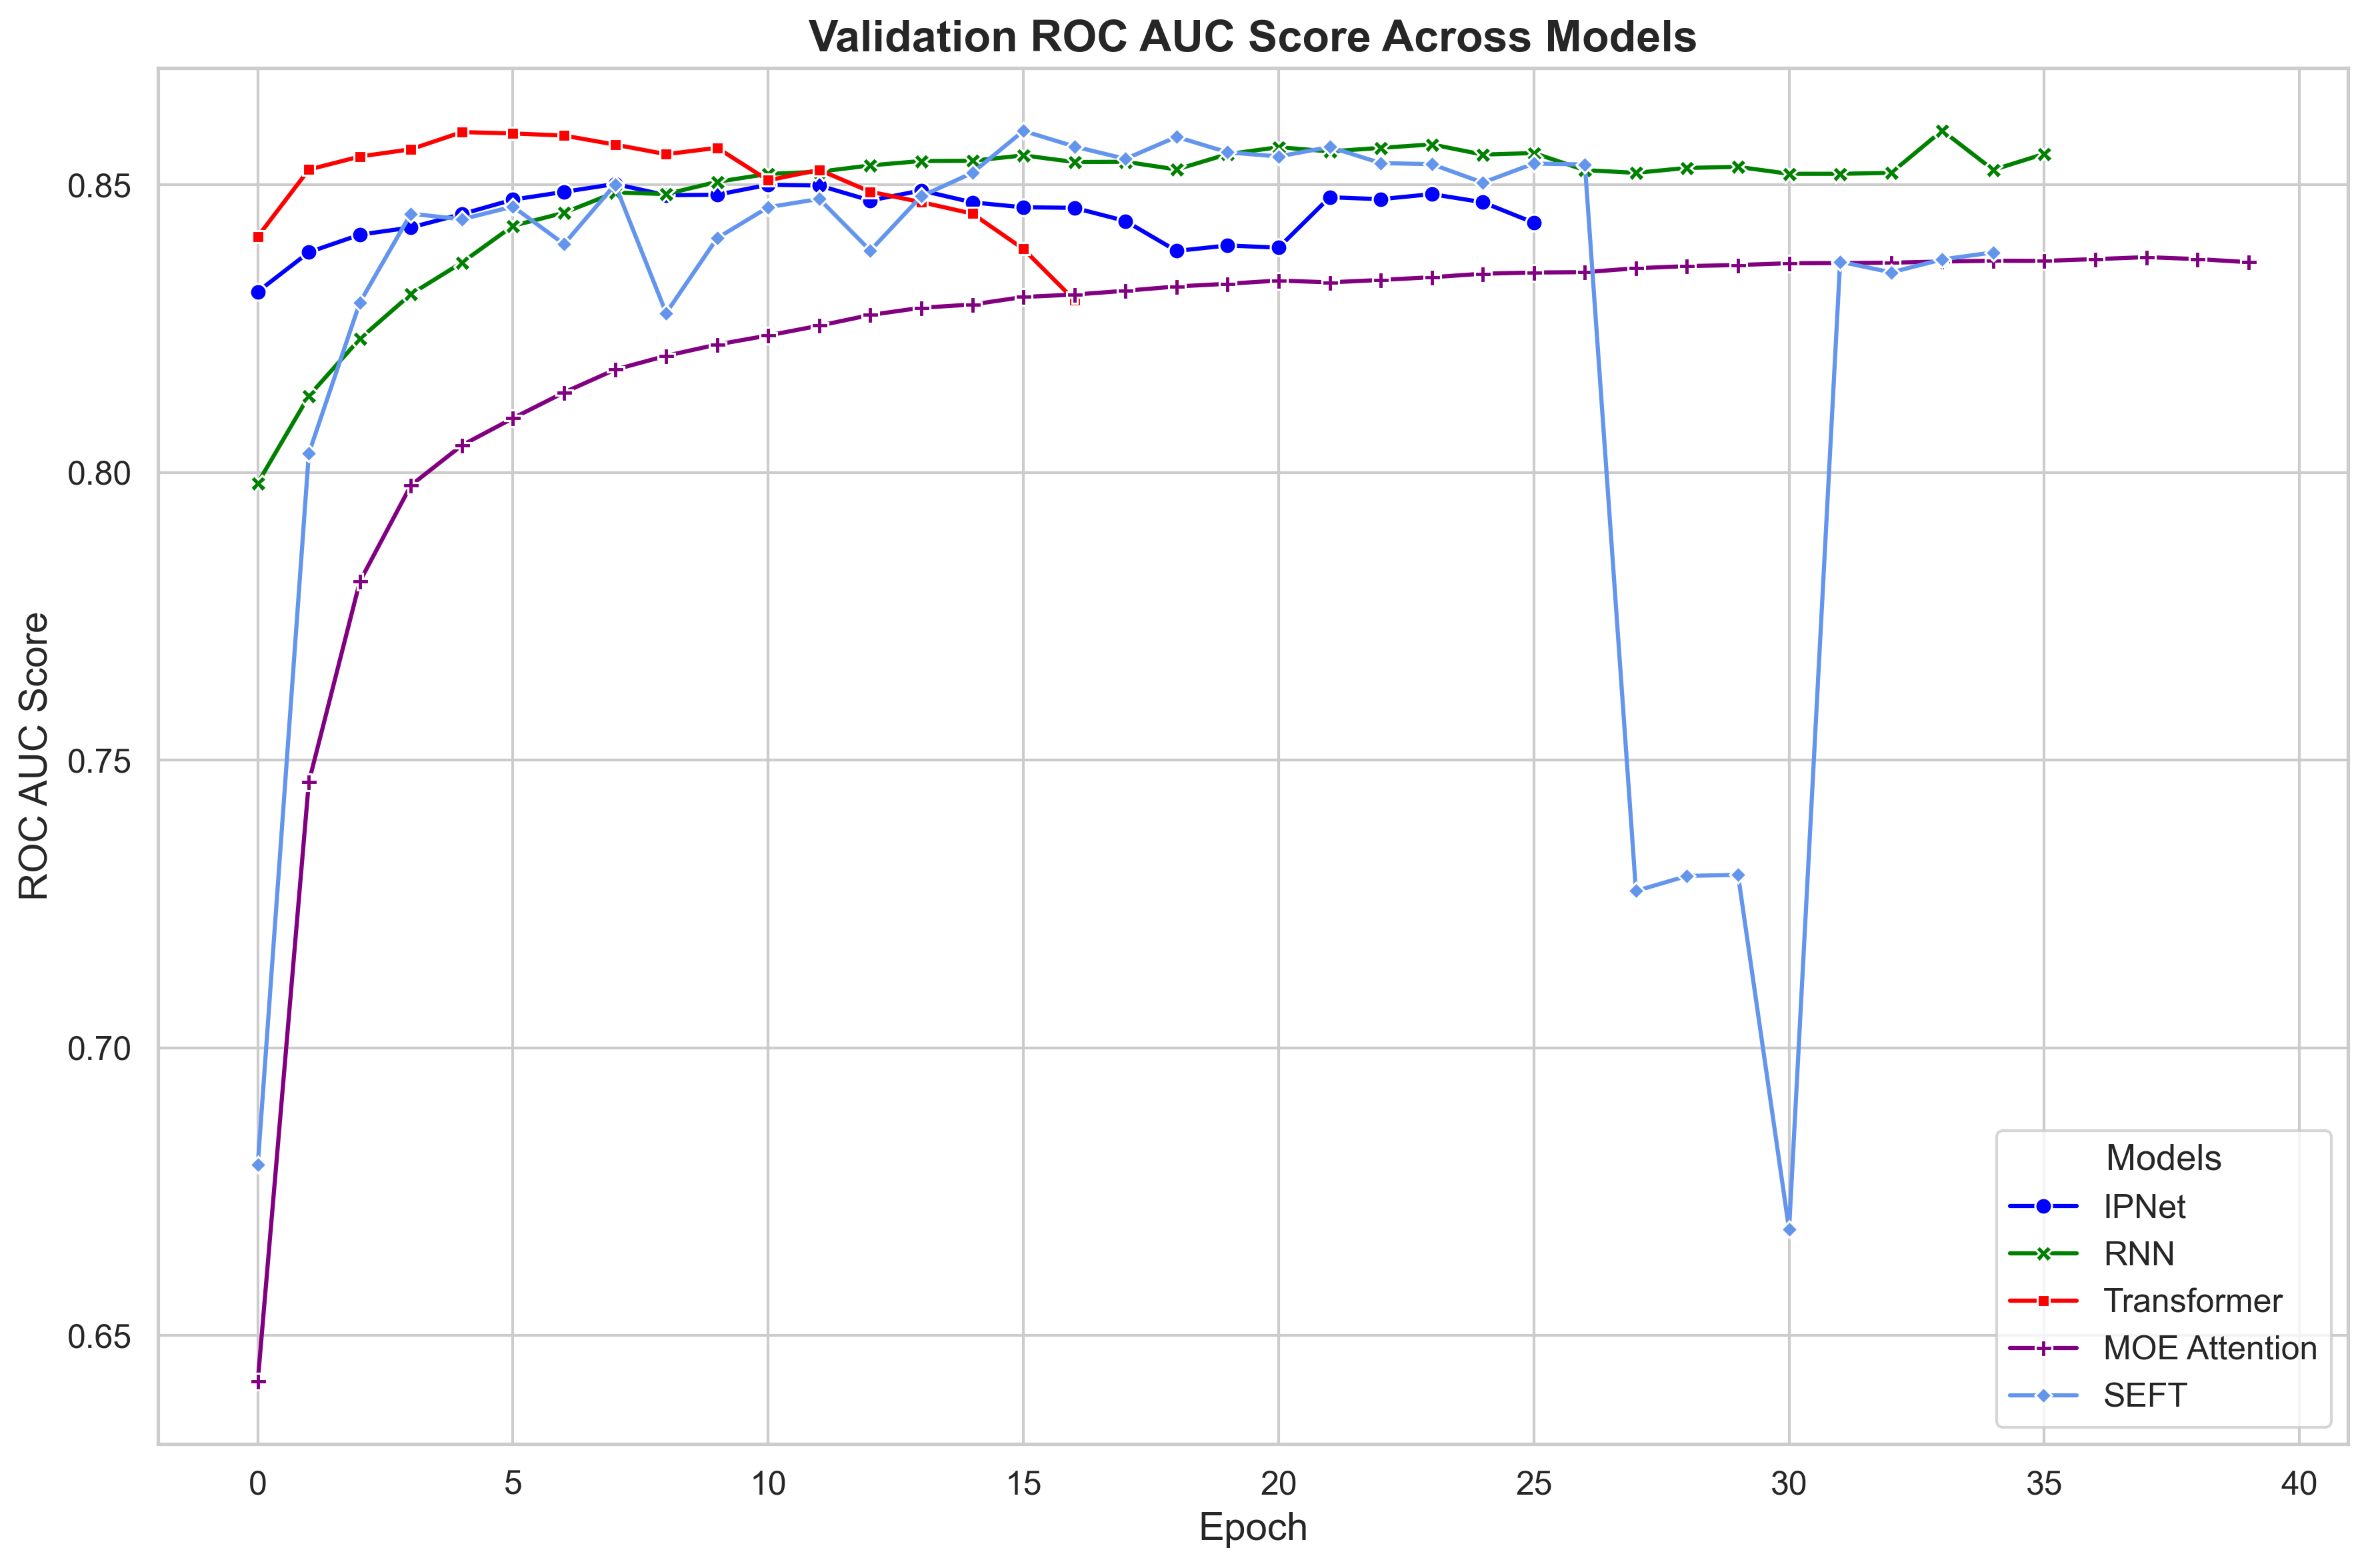

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the aesthetics are consistent
sns.set_theme(style="whitegrid")

# Combine the data into a single DataFrame for easier handling in Seaborn
import pandas as pd

data = {
    'epoch': list(range(len(df_ipnet['val_roc_auc_score']))) + 
             list(range(len(df_rnn['val_roc_auc_score']))) + 
             list(range(len(df_transformer['val_roc_auc_score']))) + 
             list(range(40)) + 
             #list(range(40)) + 
            # list(range(40)) +
             list(range(len(df_seft['val_roc_auc_score']))),

    'roc_auc_score': list(df_ipnet['val_roc_auc_score']) +
                     list(df_rnn['val_roc_auc_score']) +
                     list(df_transformer['val_roc_auc_score']) +
                     list(df_moe['auc_score'][:40]) +
                    # list(df_multi_head['roc_auc_score'][:40]) +
                    # list(df_attention_classifier['roc_auc_score'][:40]) +
                     list(df_seft['val_roc_auc_score']),

    'model': ['IPNet'] * len(df_ipnet['val_roc_auc_score']) +
             ['RNN'] * len(df_rnn['val_roc_auc_score']) +
             ['Transformer'] * len(df_transformer['val_roc_auc_score']) +
             ['MOE Attention'] * 40 +
             #['Multi-Head Attention'] * 40 +
             #['Attention Classifier'] * 40 + 
             ['SEFT'] * len(df_seft['val_roc_auc_score'])
}

print(len(data['epoch']), len(data['roc_auc_score']), len(data['model']))

df_combined = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(12, 8), dpi=300)
sns.lineplot(
    data=df_combined,
    x='epoch',
    y='roc_auc_score',
    hue='model',
    style='model',
    markers=True,
    dashes=False,
    palette={
        'IPNet': 'blue',
        'RNN': 'green',
        'Transformer': 'red',
        'MOE Attention': 'purple',
        'Multi-Head Attention': 'orange',
        'Attention Classifier': 'black',
        'SEFT': 'cornflowerblue'
    }
)

plt.title('Validation ROC AUC Score Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.legend(title='Models', fontsize=12, title_fontsize=13, loc='best', frameon=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('figures/roc_auc_score.png')
# Show the plot
plt.show()


In [16]:
models = [r'ipnet', r'rnn', r'transformer', r'MOE_attention_MAMBA', r'seft']
splits = [r'split_1', r'split_2', r'split_3', r'split_4', r'split_5']
files = [r'test_results.json', r'training_log.csv']
# read json
import json
import os
import pandas as pd

auprc_scores = {}
auroc_scores = {}
accuracy_scores = {}

for model in models:
    auprc_scores[model] = []
    auroc_scores[model] = []
    accuracy_scores[model] = []
    for split in splits:
        split_path = os.path.join(basefolder, model, split, files[0])
        with open(split_path, 'r') as f:
            data = json.load(f)
            auprc_scores[model].append(data['AUPRC'])
            auroc_scores[model].append(data['AUROC'])
            accuracy_scores[model].append(data['accuracy'])
    
    auprc_scores[model] = (np.mean(auprc_scores[model]), np.std(auprc_scores[model]))
    auroc_scores[model] = (np.mean(auroc_scores[model]), np.std(auroc_scores[model]))
    accuracy_scores[model] = (np.mean(accuracy_scores[model]), np.std(accuracy_scores[model]))

print('accuracy', accuracy_scores)
print('auprc', auprc_scores)
print('auroc', auroc_scores)


accuracy {'ipnet': (0.7793160967472895, 0.03864207381061347), 'rnn': (0.7944954128440368, 0.01650954866609988), 'transformer': (0.7938281901584654, 0.01286027373971401), 'MOE_attention_MAMBA': (0.8682235195996665, 0.007662174530679497), 'seft': (0.801000834028357, 0.02691005127570996)}
auprc {'ipnet': (0.5168690639549214, 0.03346337902457237), 'rnn': (0.5422214838678006, 0.026560142521882234), 'transformer': (0.5367289233551424, 0.022898688906964237), 'MOE_attention_MAMBA': (0.49186689602288663, 0.033476844540854096), 'seft': (0.5339330851981674, 0.015922527936760765)}
auroc {'ipnet': (0.8538469829133787, 0.007768274911553503), 'rnn': (0.8688877064484746, 0.003704642032440957), 'transformer': (0.8642103021859843, 0.005557179412905396), 'MOE_attention_MAMBA': (0.8434118646938847, 0.008539935296275876), 'seft': (0.8584575245619277, 0.010123039015443822)}
